In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import PIL.Image
from os import path
from IPython.display import Image

In [2]:
emails_paths = 'hillary-clinton-emails/Emails.csv'
data = pd.read_csv(emails_paths, sep=',')

In [3]:
data.dropna(subset=['ExtractedBodyText'], inplace=True)
data.dropna(subset=['ExtractedSubject'], inplace=True)
data.head()

Id  DocNumber                                    MetadataSubject  \
2    3  C05739547                                      CHRIS STEVENS   
5    6  C05739559  MEET THE RIGHT-WING EXTREMIST BEHIND ANTI-MUSL...   
8    9  C05739562                                SECRETARY'S REMARKS   
9   10  C05739563                                      MORE ON LIBYA   
10  11  C05739564             ABZ AN HBJ ON LIBYA AND WEST BANK/GAZA   

           MetadataTo       MetadataFrom  SenderPersonId  \
2                  ;H    Mills, Cheryl D            32.0   
5   Russorv@state.gov                  H            80.0   
8                   H  Sullivan, Jacob J            87.0   
9                   H                NaN             NaN   
10                  H  Sullivan, Jacob J            87.0   

             MetadataDateSent       MetadataDateReleased  \
2   2012-09-12T04:00:00+00:00  2015-05-22T04:00:00+00:00   
5   2012-09-12T04:00:00+00:00  2015-05-22T04:00:00+00:00   
8   2012-09-12T04:00:00+00:00  2015-05-22T04:00:00+00:00   
9   2012-09-12T04:00:00+00:00  2015-05-22T04:00:00+00:00   
10  2011-03-13T05:00:00+00:00  2015-05-22T04:00:00+00:00   

                                      MetadataPdfLink MetadataCaseNumber  \
2   DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...       F-2015-04841   
5   DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739559...       F-2015-04841   
8   DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739562...       F-2015-04841   
9   DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739563...       F-2015-04841   
10  DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739564...       F-2015-04841   

                          ...                         ExtractedTo  \
2                         ...                                  B6   
5                         ...                                 NaN   
8                         ...                                 NaN   
9                         ...                                 NaN   
10                        ...                                 NaN   

                               ExtractedFrom   ExtractedCc  \
2        Mills, Cheryl D <MillsCD@state.gov>  Abedin, Huma   
5                                        NaN           NaN   
8    Sullivan, Jacob J <Sullivanli@stategov>           NaN   
9                                        NaN           NaN   
10  Sullivan, Jacob 1 <Sullivan)) state.gov>           NaN   

                         ExtractedDateSent ExtractedCaseNumber  \
2   Wednesday, September 12, 2012 11:52 AM        F-2015-04841   
5   Wednesday, September 12, 2012 01:00 PM        F-2015-04841   
8    Wednesday, September 12, 2012 6:08 PM        F-2015-04841   
9                                      NaN        F-2015-04841   
10         Sunday, March 13, 2011 10:55 AM        F-2015-04841   

   ExtractedDocNumber ExtractedDateReleased ExtractedReleaseInPartOrFull  \
2           C05739547            05/14/2015              RELEASE IN PART   
5           C05739559            05/13/2015              RELEASE IN PART   
8           C05739562            05/13/2015              RELEASE IN FULL   
9           C05739563            05/13/2015              RELEASE IN PART   
10          C05739564            05/13/2015              RELEASE IN PART   

                                    ExtractedBodyText  \
2                                                 Thx   
5   Pis print.\n-•-...-^\nH < hrod17@clintonernail...   
8                                                 FYI   
9   B6\nWednesday, September 12, 2012 6:16 PM\nFwd...   
10                                       Fyi\nB6\n— —   

                                              RawText  
2   UNCLASSIFIED\nU.S. Department of State\nCase N...  
5   B6\nUNCLASSIFIED\nU.S. Department of State\nCa...  
8   UNCLASSIFIED\nU.S. Department of State\nCase N...  
9   UNCLASSIFIED\nU.S. Department of State\nCase N...  
10  UNCLASSIFIED\nU.S. Department of State\nCase N...  

[5 rows x 22 columns]

In [4]:
def getRawText():
    subjectData = data[data.ExtractedSubject.notnull()].ExtractedSubject.astype(str)
    bodyData = data[data.ExtractedBodyText.notnull()].ExtractedBodyText.astype(str)
    rawText = ' '.join(subjectData) + ' ' + ' '.join(bodyData)
    rawText = rawText.replace('\n', ' ')
    return rawText

## 1. Generate a word cloud based on the raw corpus 

### 1.1 Word cloud without preprocessing

In [5]:
rawText = getRawText()

In [6]:
d = path.dirname('__file__')
mask = np.array(PIL.Image.open(path.join(d, "mask.png"))) #US map stencil mask

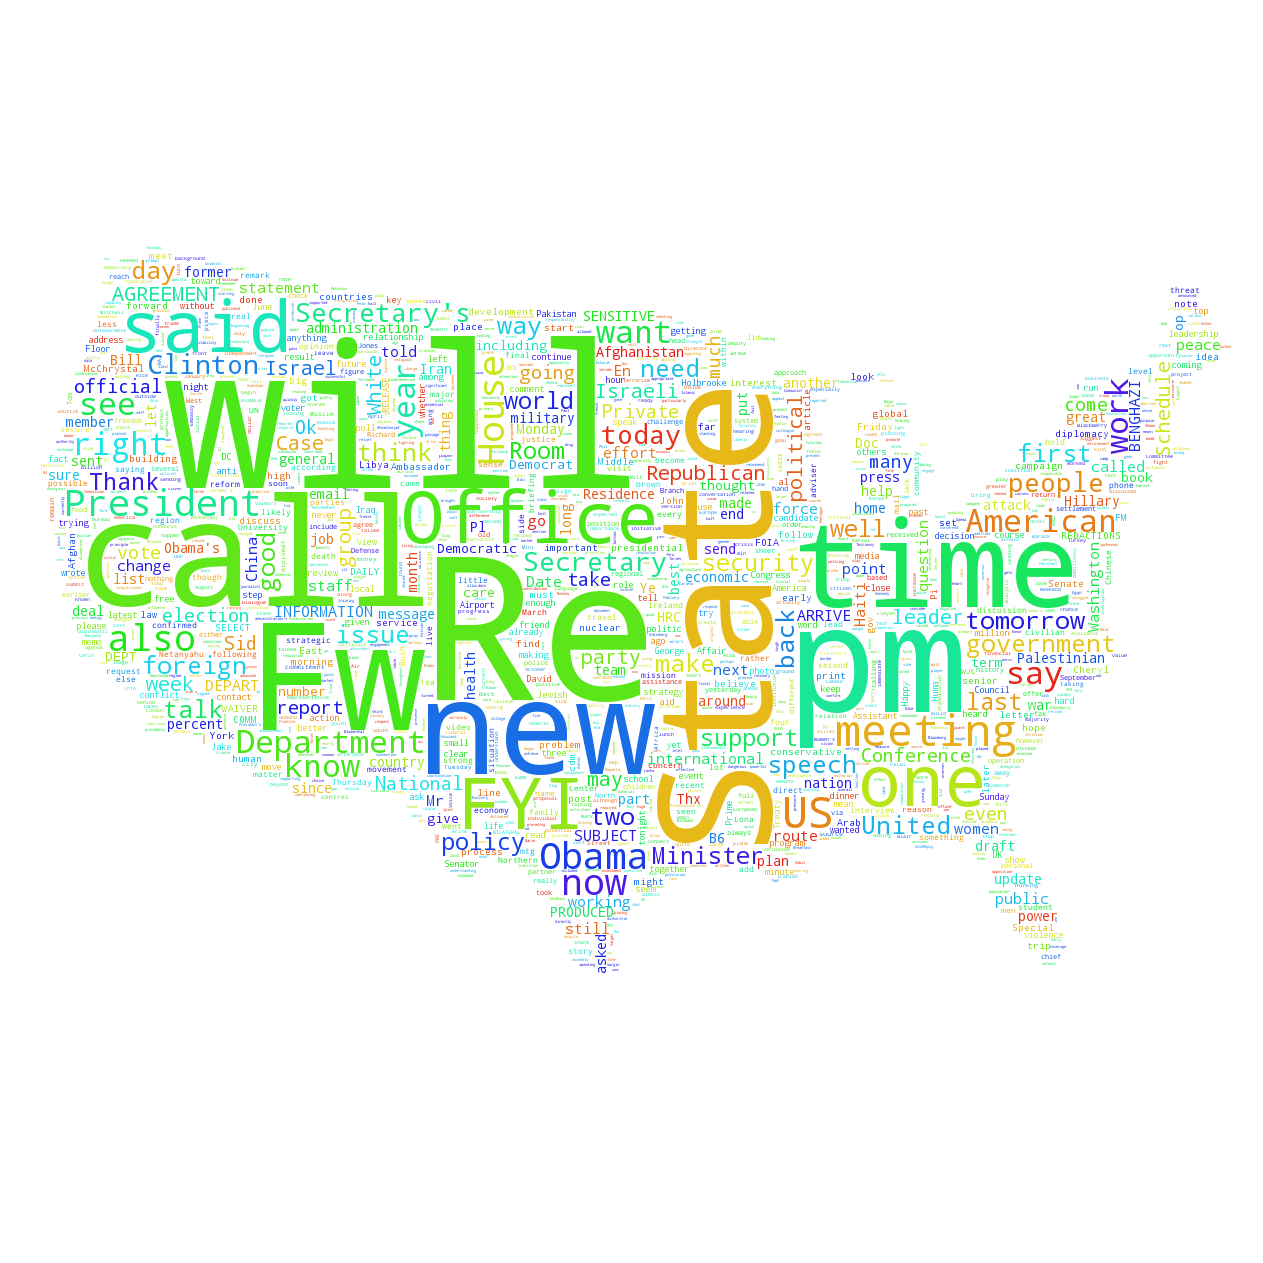

In [7]:
wc = WordCloud(background_color="white", max_words=2000, mask=mask)
wordcloud = wc.generate(rawText)
wordcloud.to_file(path.join(d, "wordcloud_raw.png"))
Image(filename='wordcloud_raw.png')

### 1.2 Word cloud with preprocessing 

In [8]:
def filterStopWords(text):
    try:
        tokens = nltk.word_tokenize(text)
    except:
        nltk.download()
        tokens = nltk.word_tokenize(text)
    stopWords = stopwords.words('english')
    customWords = ['re', 'fwd', 'fw', 'pm', 'am', 'also', 'often', 'and', 'every' 'fyi', 'tomorrow', 'today',
                   'well', '.', ',', '"', "'", '?', '&','/', '!', ':', ';', '(', ')',
                   '[', ']', '{', '}', '@', '<', '>', '-', "n't"]
    stopWords += customWords
    filtered = list()
    for token in tokens:
        token = token.lower()
        if token not in stopWords:
            filtered.append(token)
    return filtered

#http://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html
def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(word) for word in text]
    return lemmatized

def preprocess(text):
    filtered = filterStopWords(text)
    processed = lemmatize(filtered)
    return ' '.join(processed)

In [9]:
procText = preprocess(rawText)

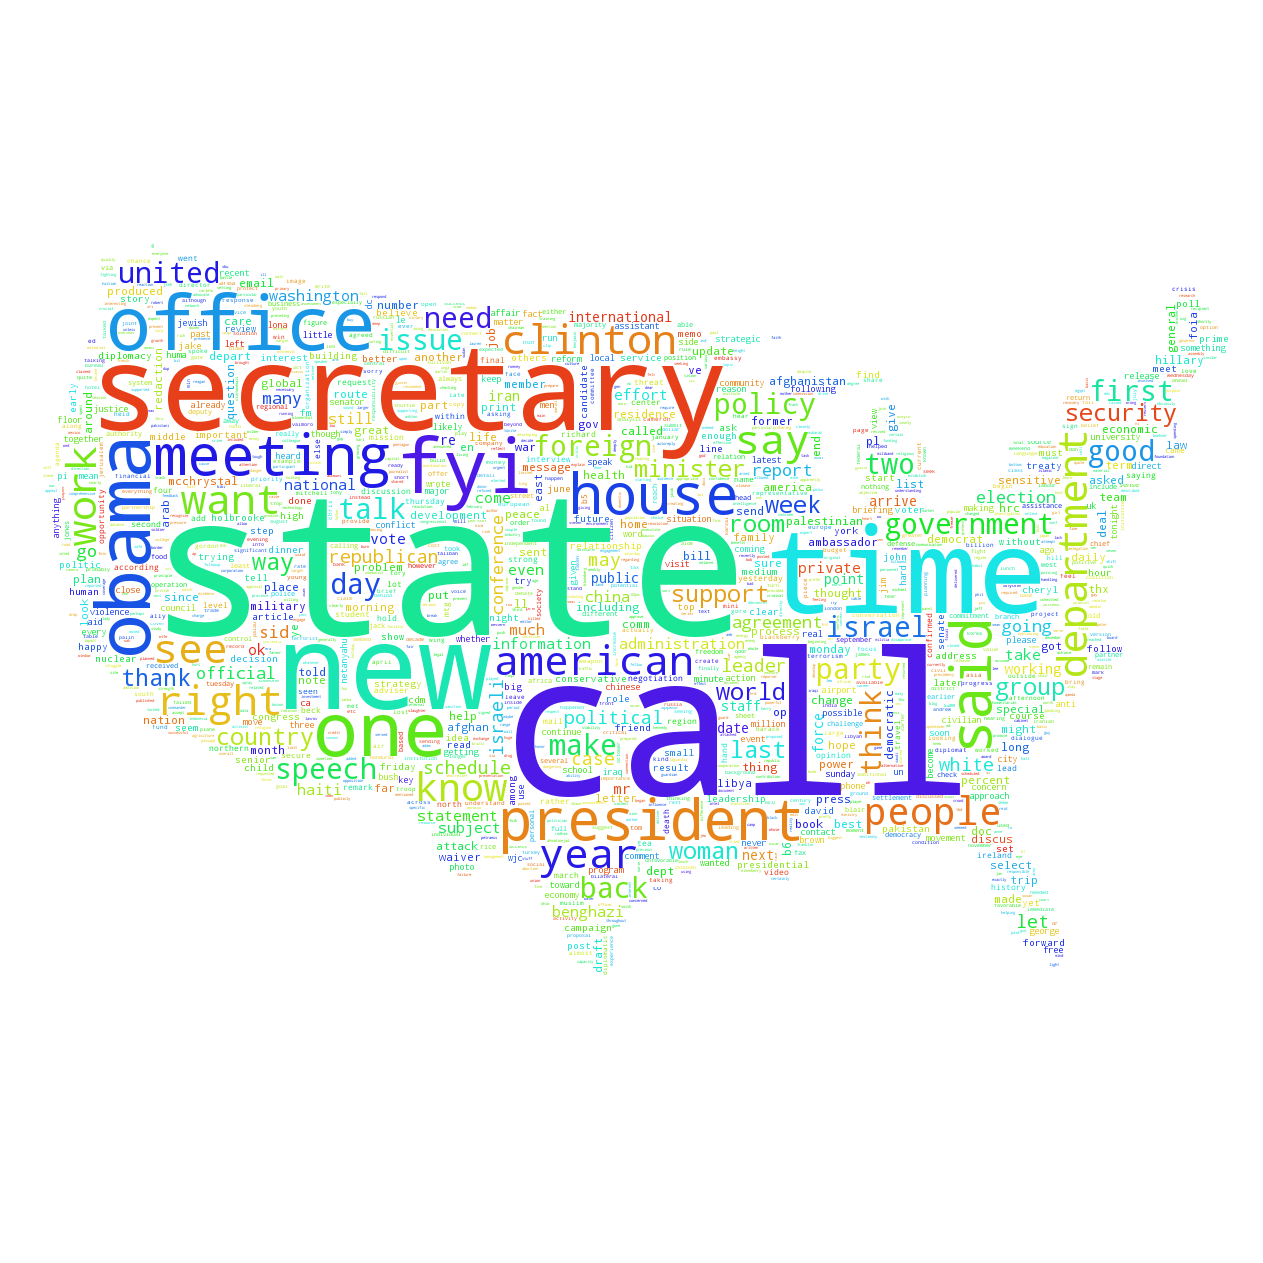

In [10]:
wc = WordCloud(background_color="white", max_words=2000, mask=mask)
wordcloud = wc.generate(procText)
wordcloud.to_file(path.join(d, "wordcloud_proc.png"))
Image(filename='wordcloud_proc.png')

In [11]:
def lemmAndStem(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(word) for word in text]
    stemmer = nltk.SnowballStemmer("english", ignore_stopwords=True)
    stemmed = [stemmer.stem(lema) for lema in lemmatized]
    return stemmed

def preprocess2(text):
    filtered = filterStopWords(text)
    processed = lemmAndStem(filtered)
    return ' '.join(processed)

In [12]:
procText = preprocess2(rawText)

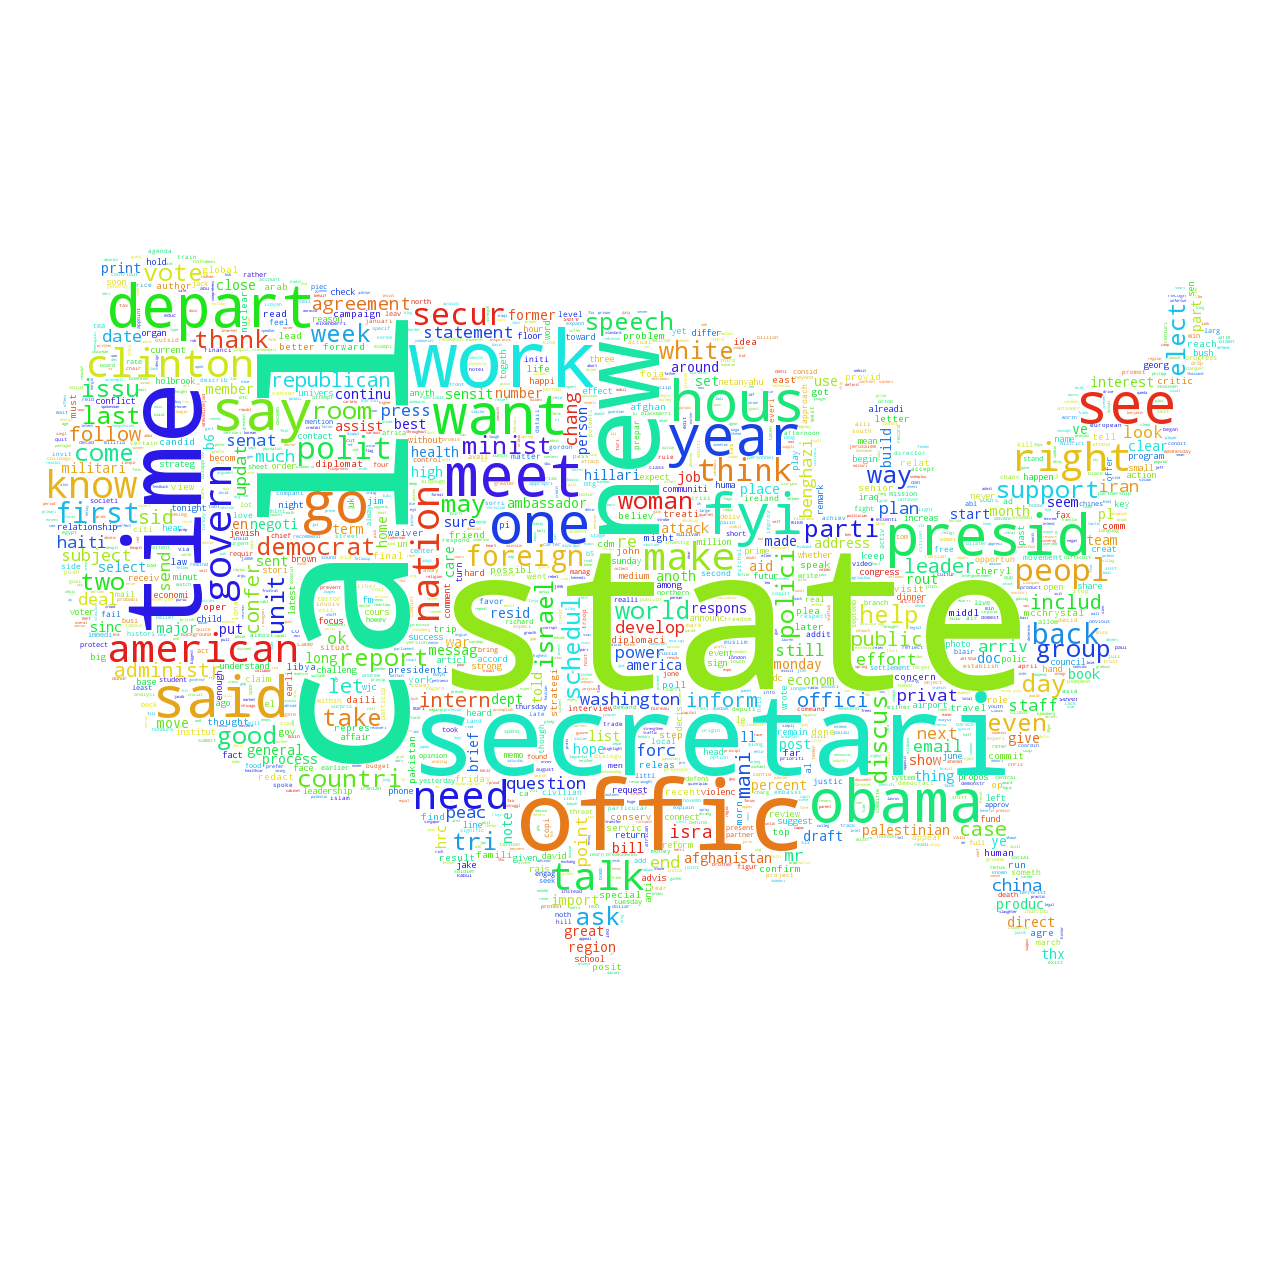

In [13]:
wc = WordCloud(background_color="white", max_words=2000, mask=mask)
wordcloud = wc.generate(procText)
wordcloud.to_file(path.join(d, "wordcloud_proc2.png"))
Image(filename='wordcloud_proc2.png')

## 2. Sentiment Analysis

https://www.kaggle.com/operdeck/d/kaggle/hillary-clinton-emails/hillary-s-sentiment-about-countries

### Clean Data

In [14]:
import re
def clean_days_month(text):
    week_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'September',
                 'November', 'December']
    hours = ['AM', 'PM']    
    return [word for word in text if word not in (week_days + months + hours)]

def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False
    
def word_contains_number(word):
    return any(ch.isdigit() for ch in word)    
        
def clean_numbers(text):
    return [word for word in text if not is_number(word) and not word_contains_number(word) ]

def clean_symbol(text):
    tmp = [re.sub(r'[\w\.-]+@[\w\.-]+', '', word)for word in text]
    return [re.sub('[!@#$,:<>\().]', '', word) for word in tmp]

def clean_text(text):
    tmp = clean_symbol(text.split())
    tmp = filterStopWords(' '.join(clean_days_month(tmp)))
    return ' '.join(clean_numbers(tmp))


In [15]:
import pycountry
list_countries = list(pycountry.countries)
accumulator = {}
list_token = clean_text(rawText).split()
for country in list_countries:
    suma =  list_token.count(country.name.lower()) + list_token.count(country.alpha_2.lower()) + list_token.count(country.alpha_3.lower().lower())
    accumulator[country.name] = suma

In [16]:
proba = pd.Series(accumulator, dtype='str')
proba

Afghanistan                              271
Albania                                   67
Algeria                                    3
American Samoa                             0
Andorra                                   12
Angola                                   135
Anguilla                                   2
Antarctica                                14
Antigua and Barbuda                        2
Argentina                                 21
Armenia                                    9
Aruba                                      1
Australia                                 18
Austria                                    2
Azerbaijan                                14
Bahamas                                    1
Bahrain                                    4
Bangladesh                                10
Barbados                                  11
Belarus                                    0
Belgium                                    4
Belize                                     0
Benin     

In [17]:
for i in list(pycountry.countries):
    print(i)

Country(alpha_2='AW', alpha_3='ABW', name='Aruba', numeric='533')
Country(alpha_2='AF', alpha_3='AFG', name='Afghanistan', numeric='004', official_name='Islamic Republic of Afghanistan')
Country(alpha_2='AO', alpha_3='AGO', name='Angola', numeric='024', official_name='Republic of Angola')
Country(alpha_2='AI', alpha_3='AIA', name='Anguilla', numeric='660')
Country(alpha_2='AX', alpha_3='ALA', name='Åland Islands', numeric='248')
Country(alpha_2='AL', alpha_3='ALB', name='Albania', numeric='008', official_name='Republic of Albania')
Country(alpha_2='AD', alpha_3='AND', name='Andorra', numeric='020', official_name='Principality of Andorra')
Country(alpha_2='AE', alpha_3='ARE', name='United Arab Emirates', numeric='784')
Country(alpha_2='AR', alpha_3='ARG', name='Argentina', numeric='032', official_name='Argentine Republic')
Country(alpha_2='AM', alpha_3='ARM', name='Armenia', numeric='051', official_name='Republic of Armenia')
Country(alpha_2='AS', alpha_3='ASM', name='American Samoa', n

Clean data and tranform the strings to tokens

In [18]:
from nltk.sentiment.util import *
to_token = nltk.tokenize.RegexpTokenizer(r'\w+|\$')
#Cleaning Body of emails
tmp = []
for i in data.ExtractedBodyText.values:
    tmp.append(clean_text(i) )
data['token_Body'] = tmp
data['token_Body'] = data['token_Body'].apply(to_token.tokenize)
#Cleanning Subject of emails
tmp = []
for i in data.ExtractedSubject.values:
    tmp.append(clean_text(i) )
data['token_Subject'] = tmp
data['token_Subject'] = data['token_Subject'].apply(to_token.tokenize)

/Users/juanluismoralperez/anaconda/lib/python3.5/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [19]:
def flatten(list1):
    return [ list1[x][y] for x in range(len(list1)) for y in range(len(list1[x]))]


In [20]:
from nltk.sentiment import SentimentIntensityAnalyzer
import pycountry

def country_sentiment_row(data_df, df_sentiment_country):
    token_data_df_ = data_df[['token_Body','token_Subject']]
    token_list_ = flatten(token_data_df_)
    
    list_countries = list(pycountry.countries)
    accumulator = {}
    list_token = flatten(token_data_df_)
    for country in list_countries:
        suma =  list_token.count(country.name.lower()) + list_token.count(country.alpha_2.lower()) + list_token.count(country.alpha_3.lower().lower())
        accumulator[country.name] = suma
    

    sentiment_words = (SentimentIntensityAnalyzer().polarity_scores(data_df.ExtractedBodyText)['compound'])
    
    for contry in accumulator.keys():
        if accumulator[contry] > 0:
            df_sentiment_country.loc[contry]['Times'] = df_sentiment_country.loc[contry]['Times'] + accumulator[contry]
            df_sentiment_country.loc[contry]['Sentiment'] = df_sentiment_country.loc[contry]['Sentiment'] + sentiment_words
            

In [21]:
df_countries = pd.DataFrame(columns=['Times','Sentiment'])
for contry in list(pycountry.countries):
    df_countries.set_value(contry.name,['Times','Sentiment'],[0, 0])
df_countries.head()

Times  Sentiment
Aruba            0.0        0.0
Afghanistan      0.0        0.0
Angola           0.0        0.0
Anguilla         0.0        0.0
Åland Islands    0.0        0.0

In [23]:
_ = data.apply(country_sentiment_row, args=(df_countries,),axis=1)

In [26]:
df_countries.sort_values(by='Times',ascending=False)

Times  Sentiment
United States                                 1629.0   196.6092
Israel                                         445.0    29.4288
Afghanistan                                    293.0    35.7483
Haiti                                          288.0    40.0558
China                                          287.0    33.0619
Réunion                                        272.0    82.8748
Libya                                          270.0     6.3441
Mauritania                                     260.0    18.6921
Venezuela, Bolivarian Republic of              242.0    67.6136
Pakistan                                       191.0    33.2385
India                                          166.0    38.9008
Albania                                        155.0     5.7475
Canada                                         146.0    42.0514
Micronesia, Federated States of                146.0    20.3120
Angola                                         141.0    42.6011
Iraq                                           129.0    14.7152
Ireland                                        126.0    18.3133
Egypt                                          100.0    18.2447
Andorra                                         92.0    18.8377
Peru                                            85.0    15.4865
Morocco                                         85.0    10.5191
Palau                                           75.0     7.7745
Namibia                                         73.0     2.6201
Colombia                                        72.0    13.9158
Honduras                                        71.0    14.0080
Turkey                                          65.0    14.4221
Indonesia                                       58.0    13.1901
Denmark                                         51.0     3.8317
Mexico                                          49.0    14.8010
Germany                                         49.0    19.2250
...                                              ...        ...
Norfolk Island                                   0.0     0.0000
Mayotte                                          0.0     0.0000
Martinique                                       0.0     0.0000
Mozambique                                       0.0     0.0000
Korea, Democratic People's Republic of           0.0     0.0000
Mali                                             0.0     0.0000
Macedonia, Republic of                           0.0     0.0000
French Polynesia                                 0.0     0.0000
Marshall Islands                                 0.0     0.0000
Maldives                                         0.0     0.0000
Russian Federation                               0.0     0.0000
Latvia                                           0.0     0.0000
Lesotho                                          0.0     0.0000
Sri Lanka                                        0.0     0.0000
Korea, Republic of                               0.0     0.0000
Saint Helena, Ascension and Tristan da Cunha     0.0     0.0000
Saint Kitts and Nevis                            0.0     0.0000
Solomon Islands                                  0.0     0.0000
Iran, Islamic Republic of                        0.0     0.0000
Heard Island and McDonald Islands                0.0     0.0000
Hong Kong                                        0.0     0.0000
French Guiana                                    0.0     0.0000
Grenada                                          0.0     0.0000
Equatorial Guinea                                0.0     0.0000
Slovakia                                         0.0     0.0000
Guernsey                                         0.0     0.0000
Pitcairn                                         0.0     0.0000
Sint Maarten (Dutch part)                        0.0     0.0000
Falkland Islands (Malvinas)                      0.0     0.0000
Swaziland                                        0.0     0.0000

[249 rows x 2 columns]

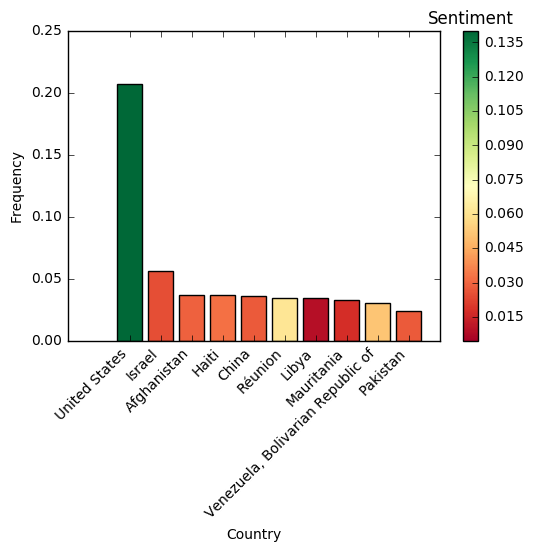

In [27]:
from matplotlib import cm
df_countries['Frequency'] = df_countries['Times']/sum(df_countries['Times'].values)
df_countries['FrequencySentiment'] = df_countries['Sentiment']/sum(df_countries['Sentiment'].values)

# Set up colors : red to green
df_set = df_countries.sort_values(by='Frequency',ascending=False)[:10]
y = np.array(df_set['FrequencySentiment'])
colors = cm.RdYlGn(y / float(max(y)))
plot = plt.scatter(y, y, c=y, cmap = 'RdYlGn')
plt.clf()
clb = plt.colorbar(plot)
clb.ax.set_title("Sentiment")

# Display bar plot : country frequency vs. country name, with color indicating polarity score
plt.bar(range(df_set.shape[0]), df_set['Frequency'], align='center', tick_label=df_set.index, color=colors)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.show()

### 3. Topic modelling

In [35]:
from gensim import models, corpora
import gensim

In [36]:
list_token = clean_text(rawText).split()
print(list_token)

['chris', 'stevens', 'meet', 'right', 'wing', 'extremist', 'behind', 'anti-muslim', 'film', 'sparked', 'deadly', 'riots', 'fvv', 'secretary', "'s", 'remarks', 'libya', 'abz', 'libya', 'west', 'bank/gaza', 'hey', 'dry', 'eye', 'nea', 'youth', 'libya', 'one', 'photo', 'libya', 'libya', 'h', 'magariaf', 'attack', 'us', 'libya', 'sid', 'h', 'magariaf', 'attack', 'us', 'libya', 'sid', 'proposed', 'quad', 'deal', 'libya', 'amb', 'stevens', 'cnn', 'belief', 'biog', 'prothero', 'chris', 'stevens', 'mission', 'quick', 'summary', 'potus', 'calls', 'presidents', 'libya', 'egypt', 'wash', 'post', 'hillary', 'clinton', 'tries', 'calm', 'i-u', 'sentiment', 'protesters', 'storm', 'quick', 'summary', 'potus', 'calls', 'presidents', 'libya', 'egypt', 'condolences', 'netanyahu', 'situation', 'report', 'sbu', 'great', 'work', 'thanks', 'making', 'heros', 'homecoming', 'deserved', 'libyan', 'benhazi/protest', 'statements', 'libyan', 'fav', 'pretty', 'powerful', 'piece', 'standing', 'diplomats', 'libyan', 

In [37]:
dic = corpora.Dictionary([list_token])
corpus = [dic.doc2bow([text]) for text in list_token]

In [38]:
print(np.shape(corpus))
print(corpus[0][0])

(240277, 1, 2)
(6970, 1)


In [39]:
for x in range(5,41,5):
    number_of_topics = str(x)
    stem = 'topics'+ number_of_topics+".lda"
    lda = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=number_of_topics, id2word=dic)
    lda.save(stem)

In [40]:
number_of_topics = 30
number_of_topics_string = str(number_of_topics)
stem = 'topics' + number_of_topics_string + ".lda"
lda = gensim.models.LdaModel.load(stem)

#prints the number of topics that was inputed when the model was created
np.shape(lda.print_topics(num_topics = number_of_topics))
lda.show_topics(num_topics = number_of_topics)

[(0,
  '0.112*"--" + 0.039*"since" + 0.036*"\'d" + 0.024*"effort" + 0.023*"yes" + 0.019*"worth" + 0.017*"order" + 0.017*"ca" + 0.017*"bring" + 0.016*"night"'),
 (1,
  '0.057*"united" + 0.052*"—" + 0.047*"foreign" + 0.047*"going" + 0.040*"public" + 0.029*"part" + 0.021*"plans" + 0.019*"sorry" + 0.018*"deal" + 0.018*"thought"'),
 (2,
  '0.105*"call" + 0.035*"washington" + 0.028*"beck" + 0.018*"democrats" + 0.017*"mtg" + 0.016*"wars" + 0.015*"general" + 0.014*"instead" + 0.014*"fox" + 0.012*"reagan"'),
 (3,
  '0.064*"said" + 0.056*"department" + 0.034*"support" + 0.031*"saw" + 0.030*"take" + 0.030*"white" + 0.027*"may" + 0.026*"israel" + 0.024*"military" + 0.023*"women"'),
 (4,
  '0.143*"new" + 0.048*"people" + 0.048*"bill" + 0.046*"world" + 0.046*"back" + 0.041*"government" + 0.037*"holbrooke" + 0.023*"come" + 0.017*"ahead" + 0.015*"use"'),
 (5,
  '0.058*"many" + 0.051*"national" + 0.021*"course" + 0.020*"richards" + 0.019*"forces" + 0.016*"ops" + 0.016*"whether" + 0.015*"release" + 0.01

## Bonus Conexion 

In [41]:
dataset = data.copy()
dataset.dropna(subset=['MetadataFrom'], inplace=True)
dataset.dropna(subset=['MetadataTo'], inplace=True)

In [42]:
dataset_ = dataset[['MetadataFrom', 'MetadataTo']]

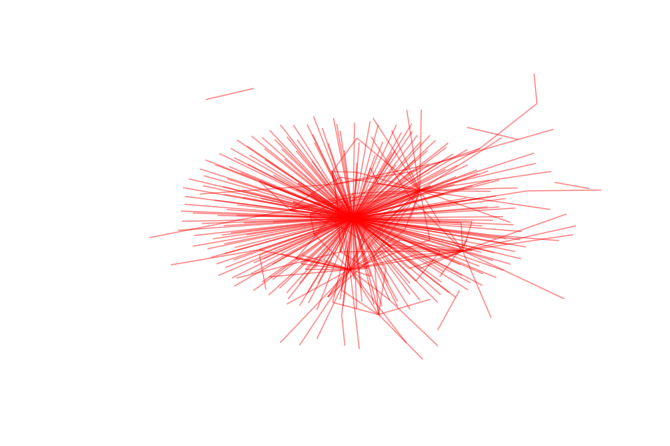

In [43]:
import networkx as nx
G=nx.Graph()
a = set(dataset_.MetadataFrom.values)
b = set(dataset_.MetadataTo.values)
c = set(list(a) + list(b))
G.add_nodes_from(list(c))
edges = [ (x, y) for x, y in dataset_.values.tolist()]
G.add_edges_from(edges)

try: # draw
    pos=nx.spring_layout(G,iterations=10)
    nx.draw(G,pos,node_size=0,alpha=0.4,edge_color='r',font_size=16)
    plt.figure(figsize=(20,20))    
    plt.show()
except: # matplotlib not available
    pass